# Explore the wine quality dataset
## Read the data
### Import Libraries

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

### Read the data
Data pulled from https://www.geeksforgeeks.org/machine-learning/wine-quality-prediction-machine-learning/ 
License: CC0 Public Domain
Quality scores are between 0 and 10

In [22]:
wine = pd.read_csv('data/winequalityN.csv')
wine.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


Let's look at the datatypes. Wine type is the only non-quantitative feature. There appears to be null values

In [23]:
wine.info()

<class 'pandas.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   str    
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), str(1)
memory usage: 660.0 KB


Let's look at the summary metrics for quantitative columns

In [24]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


### Data Cleaning
How many null values are there per column?

In [25]:
wine.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

Only the null feature columns are null. The percentage of data that is null is less than 1% I don't have a concern with using any of these features. 
During cross validation, I will replace null values with the mean of the column.

In [26]:
# clean_wine = wine.copy()

In [27]:
# for column in clean_wine.columns:
#     if clean_wine[column].isnull().sum() > 0 :
#         clean_wine[column] = clean_wine[column].fillna(clean_wine[column].mean())

In [28]:
# clean_wine.isnull().sum()

In [29]:
# clean_wine['quality_bin'] = np.where(clean_wine['quality'] > 5, 'high', 'low')

### Visualize the Distribution of Features

Create a binary variable to classify. This variable is 1 if quality is greater than 5.

In [30]:
wine['quality_bin'] = [1 if x > 5 else 0 for x in wine.quality]

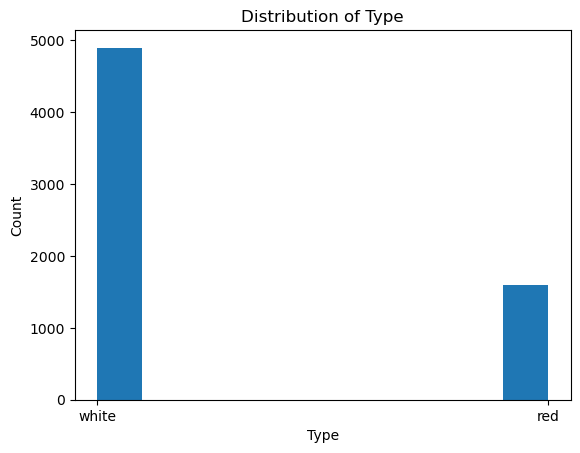

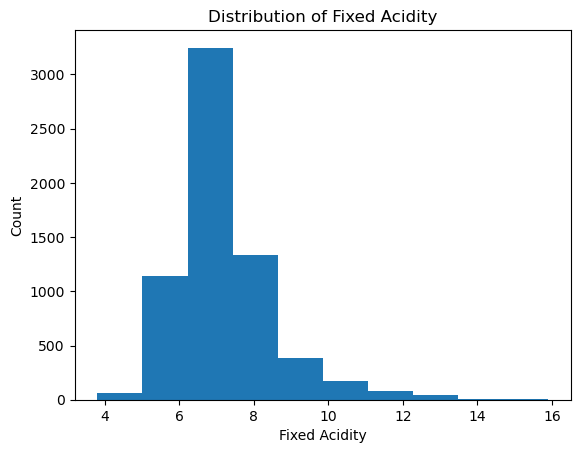

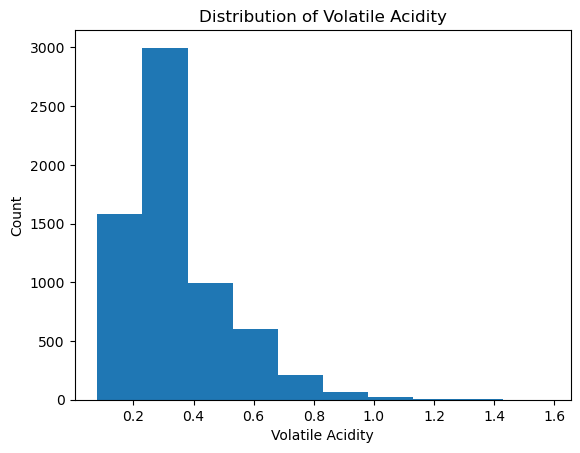

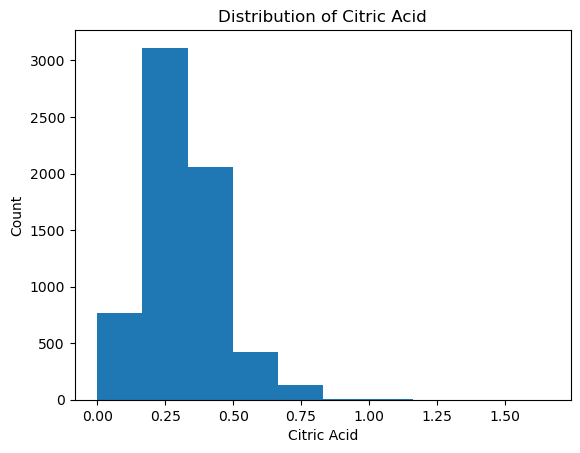

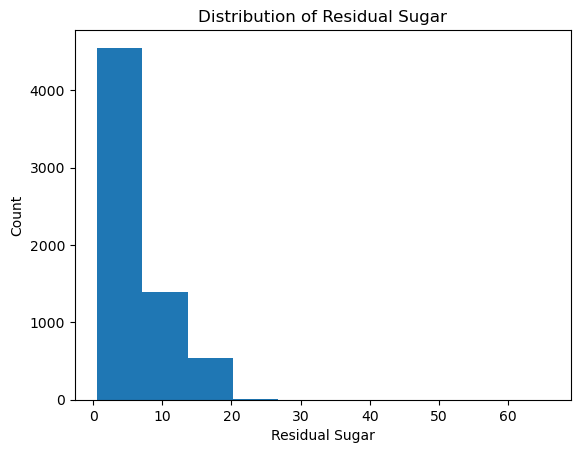

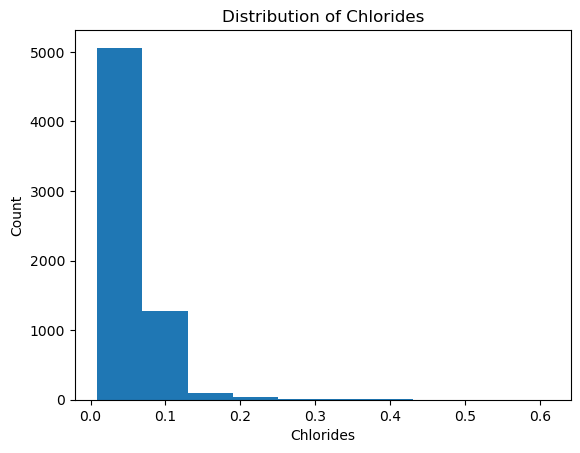

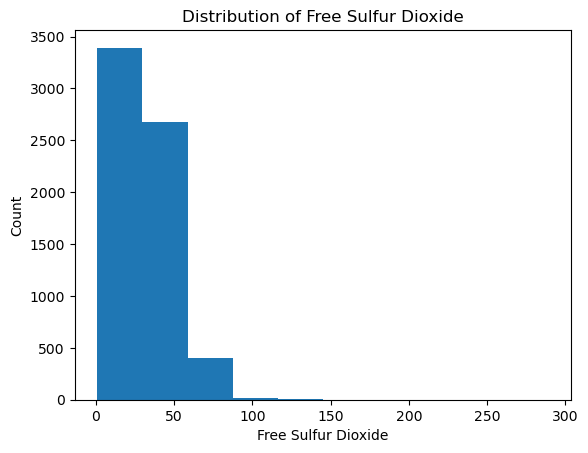

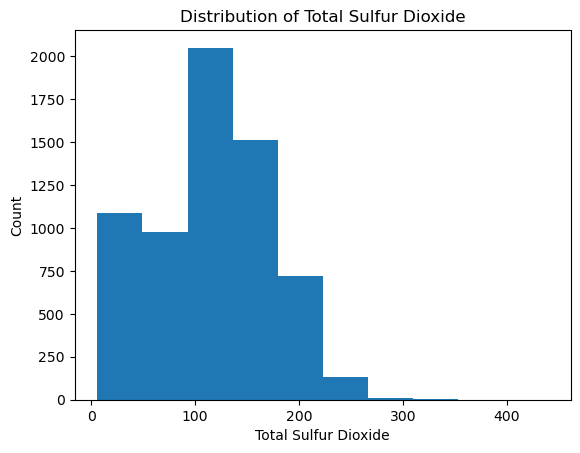

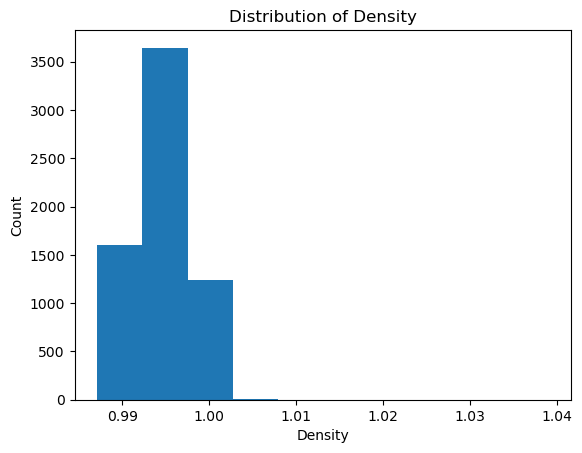

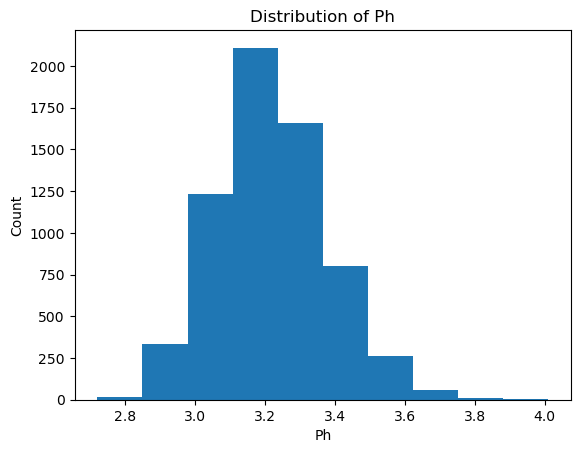

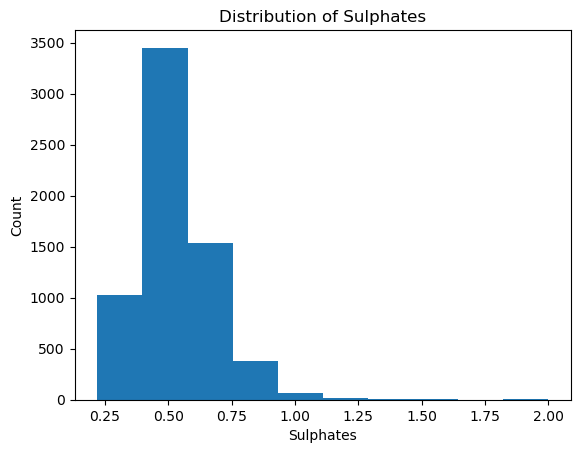

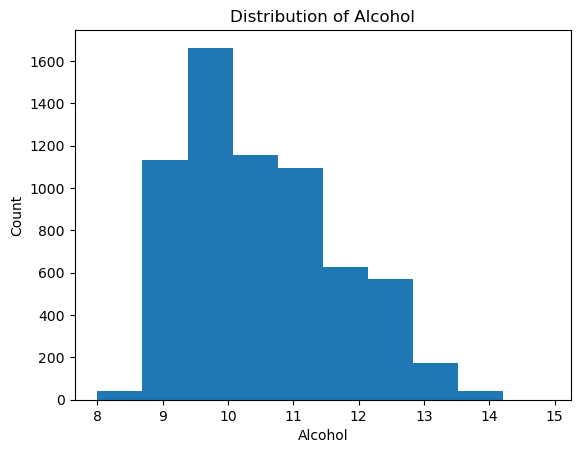

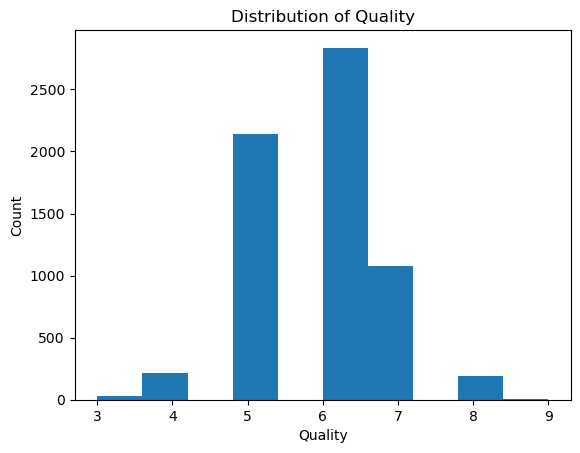

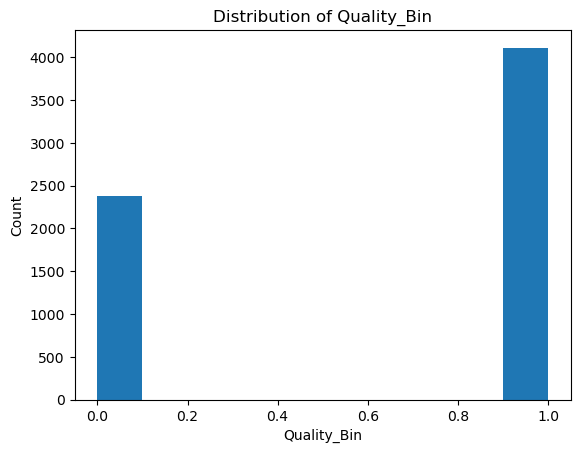

In [31]:
for col in wine.columns:
    fig, ax = plt.subplots()
    ax.hist(wine[col])
    ax.set_xlabel(col.title())
    ax.set_ylabel("Count")
    ax.set_title(f"Distribution of {col.title()}")

We can notice that quality_bin is not equally distributed
Look at the same plots but colored by quality_bin

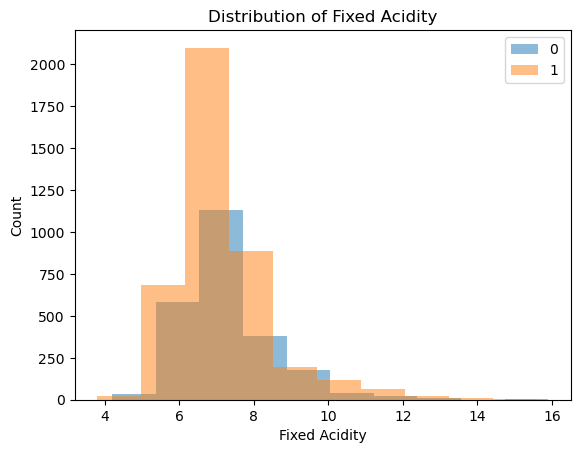

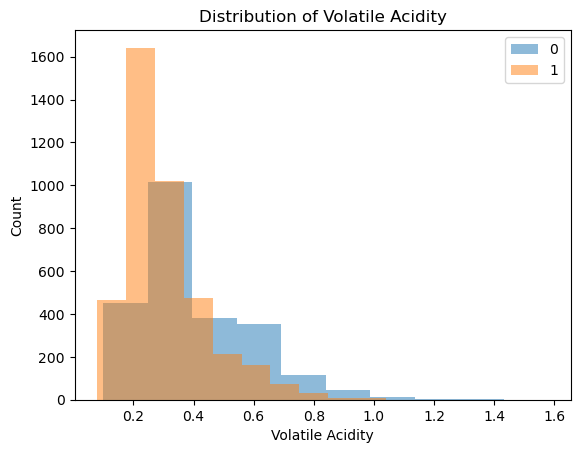

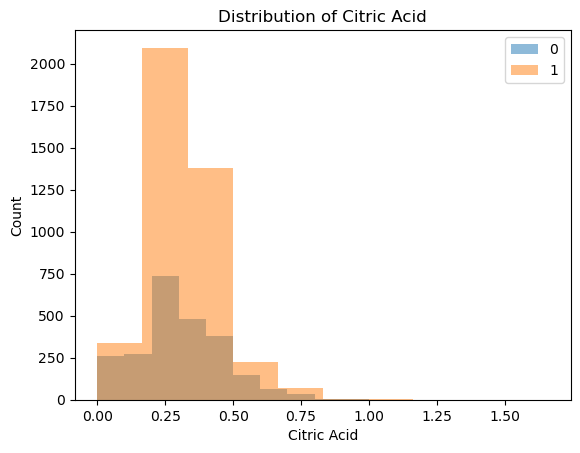

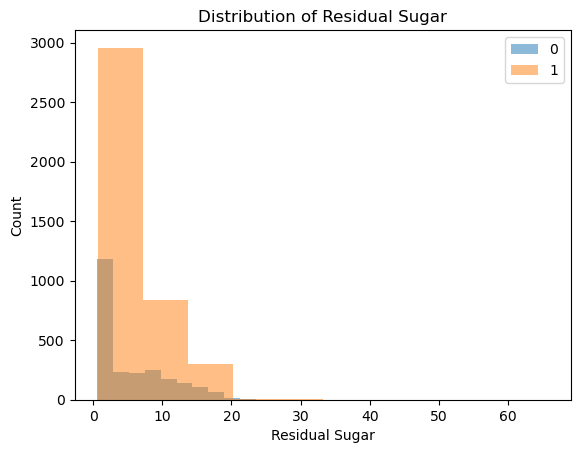

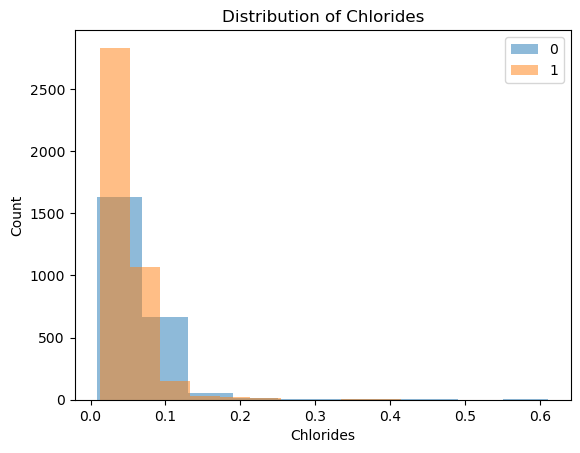

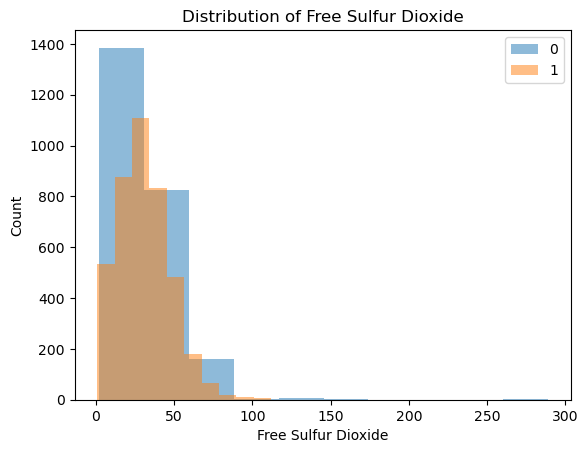

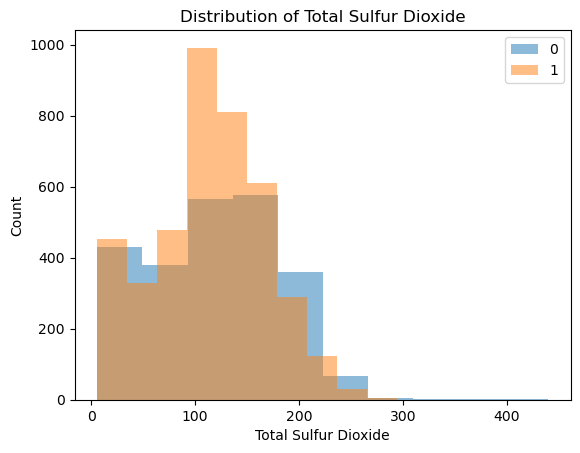

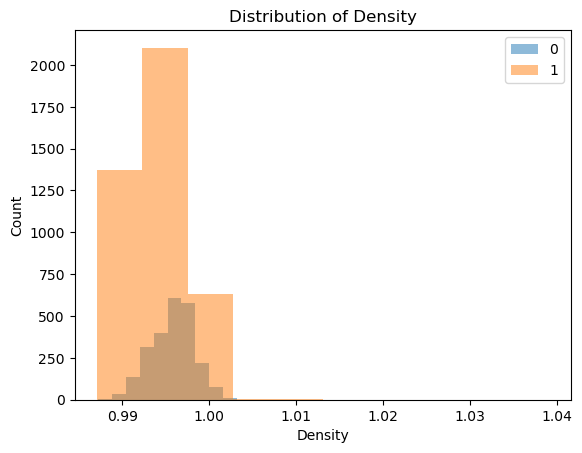

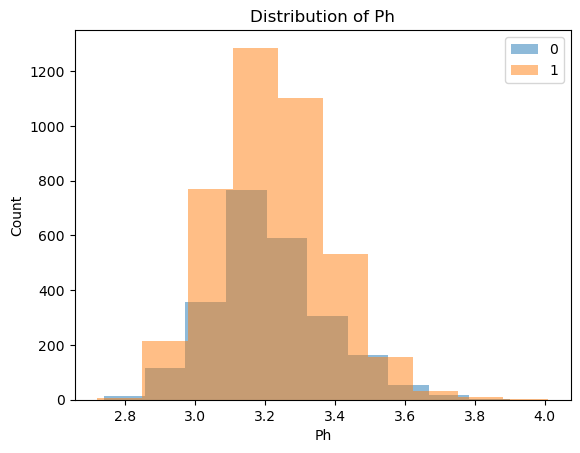

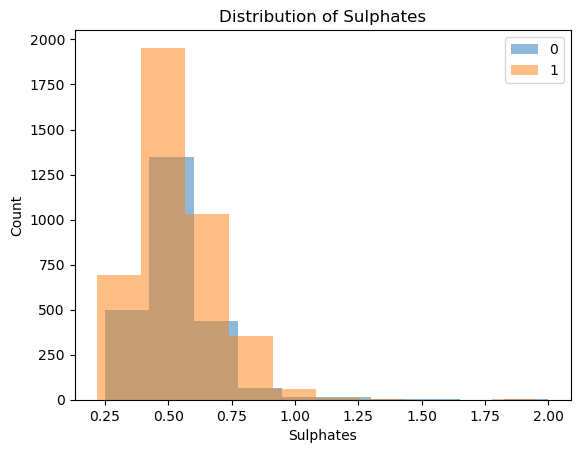

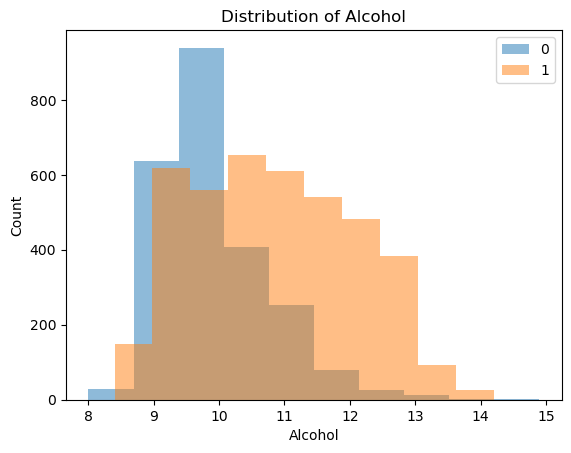

In [32]:
numeric_features = ['fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

for col in numeric_features:
    fig, ax = plt.subplots()
    wine.groupby('quality_bin')[col].plot(kind='hist', alpha=0.5, legend=True, ax = ax)
    ax.set_xlabel(col.title())
    ax.set_ylabel("Count")
    ax.set_title(f"Distribution of {col.title()}")

### Data Cleaning
Convert type into a numeric column

In [33]:
wine_clean = wine.copy()
wine_clean['type_n'] = [1 if x == 'white' else 0 for x in wine_clean.type]

Drop original type column and original quality column

In [34]:
wine_clean.drop(columns=['type', 'quality'], inplace = True)

Check for high correlation

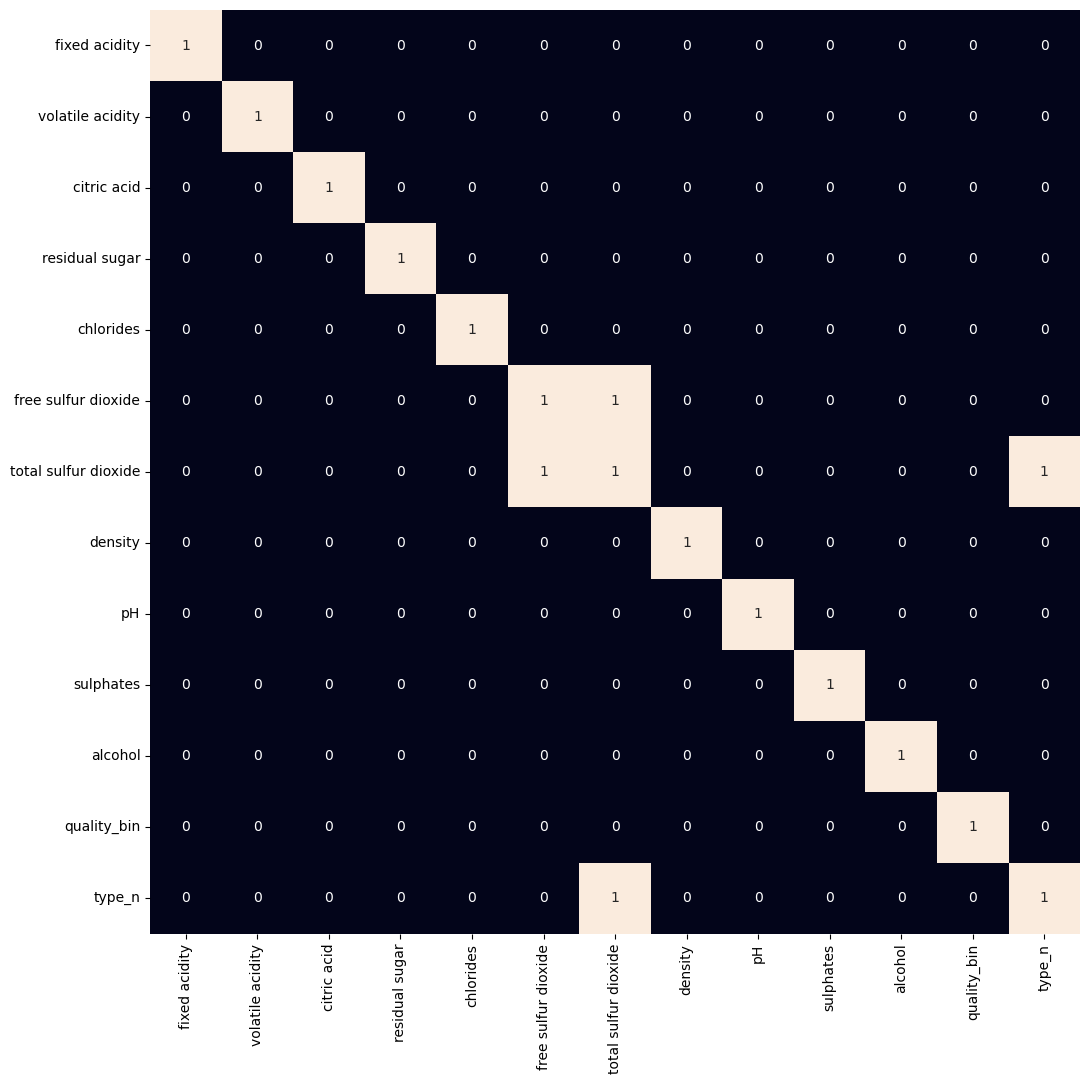

In [35]:
plt.figure(figsize = (12,12))
sb.heatmap(wine_clean.corr() > 0.7, annot = True, cbar = False)
plt.show()

Drop total sulfur dioxide as it highly correlated with type_n and free sulfur dioxide

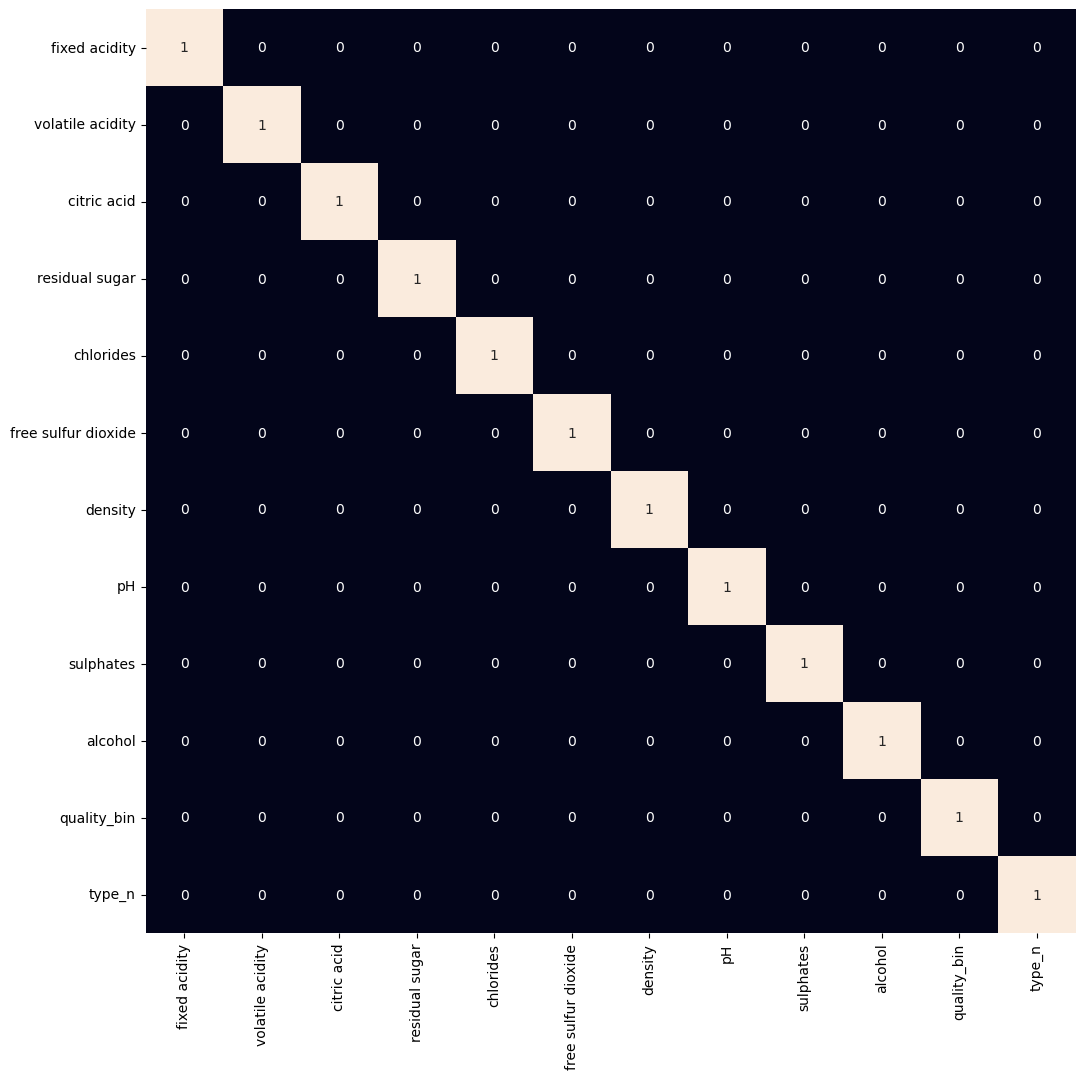

In [36]:
wine_clean.drop(columns=['total sulfur dioxide'], inplace = True)
plt.figure(figsize = (12,12))
sb.heatmap(wine_clean.corr() > 0.7, annot = True, cbar = False)
plt.show()

### Write out a cleaned feature file

In [37]:
wine_clean.to_csv('data/wine_clean.csv')